 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [3]:
# Count nulls
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [9]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history['Close'] = sp500_history['Close'].astype('float')

In [11]:
# Calculate Daily Returns
daily_returns = sp500_history.pct_change()

In [12]:
# Drop nulls
daily_returns.dropna(inplace=True)
daily_returns.isna().sum()

Close    0
dtype: int64

In [13]:
# Rename Column
daily_returns.columns = ['S&P500']

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
df = pd.concat([whale_returns, algo_returns, daily_returns], join='outer', axis='columns')
df.dropna(inplace=True)
df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

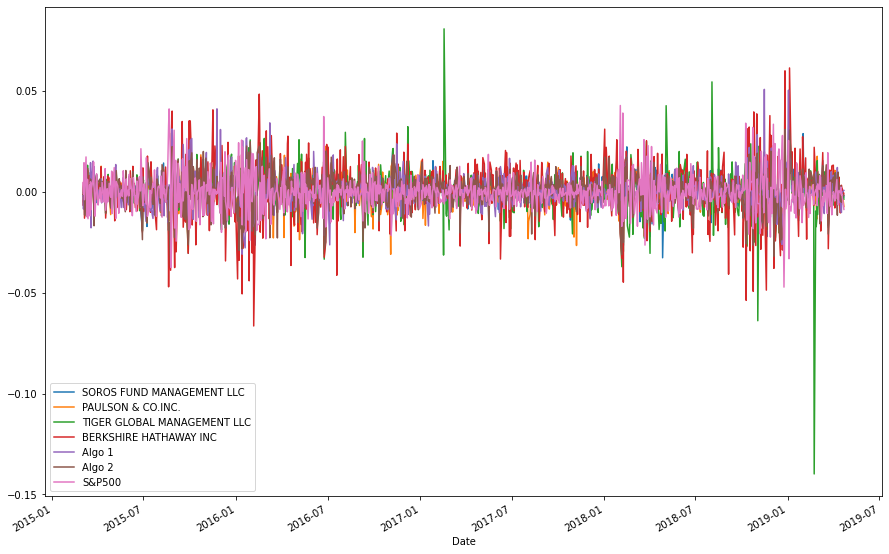

In [15]:
# Plot daily returns

df.plot(kind='line', figsize=(15, 10))

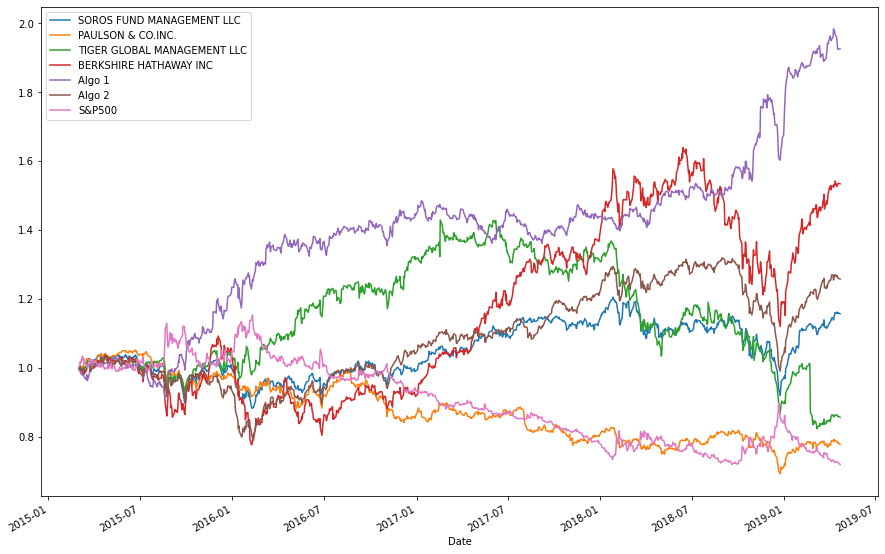

In [16]:
# Plot cumulative returns
cumulative_returns = (1 + df).cumprod()
cumulative_returns.plot(kind='line', figsize=(15,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

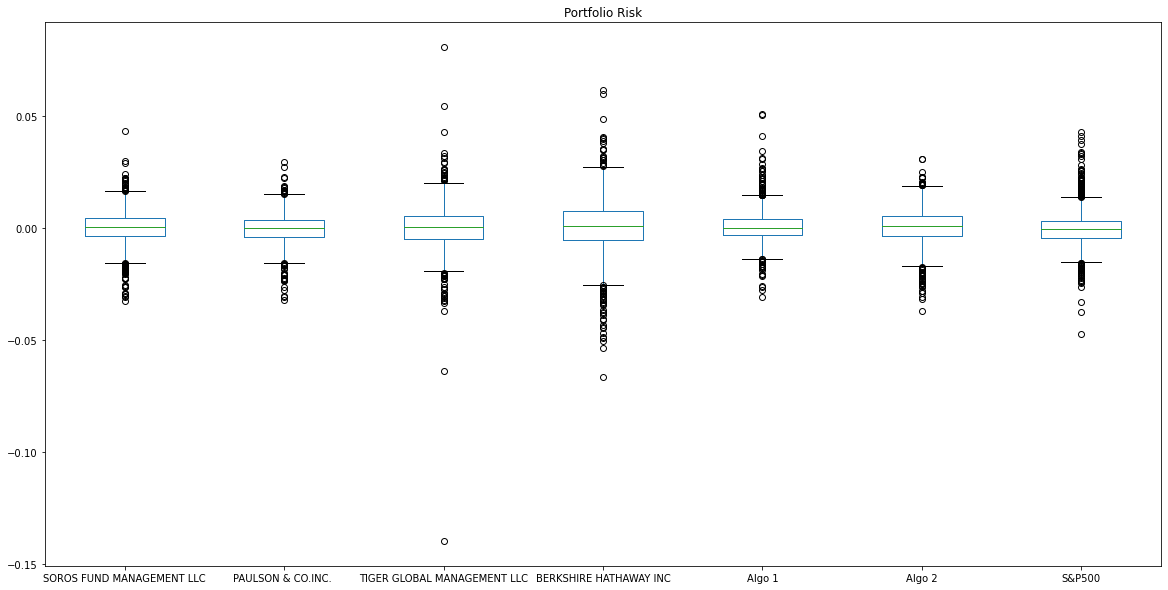

In [17]:
# Box plot to visually show risk
# whale_std = whale_returns.pct_change().std()
# algo_std = algo_returns.pct_change().std()
# sp500_std = sp500_history.pct_change().std()
# algo_std.plot.box()
df.plot.box(figsize=(20, 10), title="Portfolio Risk")

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
daily_std = df.std()
daily_std.head(n=7)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P500                         0.008587
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
riskier = daily_std.iloc[:] > daily_std['S&P500']
riskier

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500                         False
dtype: bool

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

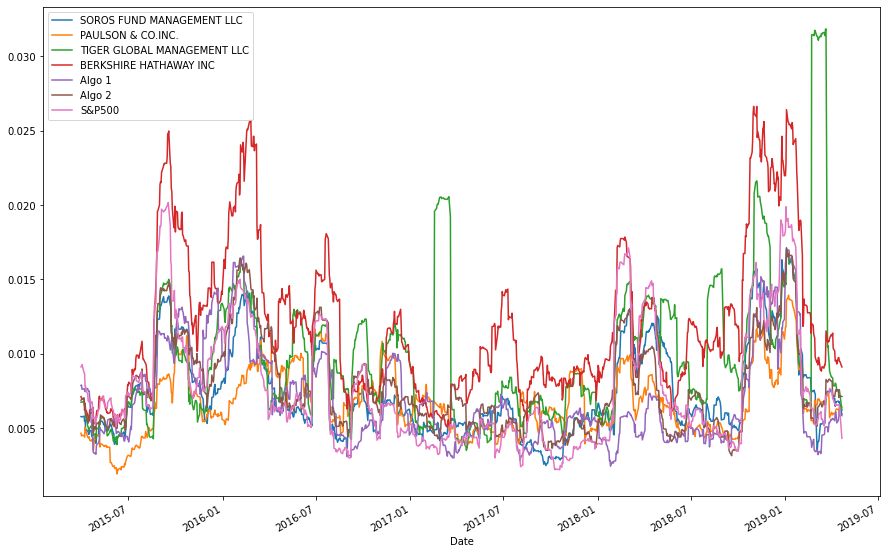

In [21]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
rolling_std_21 = df.rolling(window=21).std()

rolling_std_21.plot(figsize=(15, 10))

In [22]:
# Construct a correlation table
correlation = df.corr()
correlation.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963


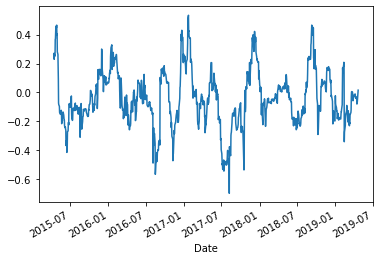

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance = df['Algo 1'].cov(df['S&P500'])
variance = df['S&P500'].var()

rolling_covariance = df['Algo 1'].rolling(window=30).cov(df['S&P500'])
rolling_variance = df['S&P500'].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance

rolling_beta.plot()

In [24]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [25]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (df.mean() * 252) / (df.std() * np.sqrt(252))


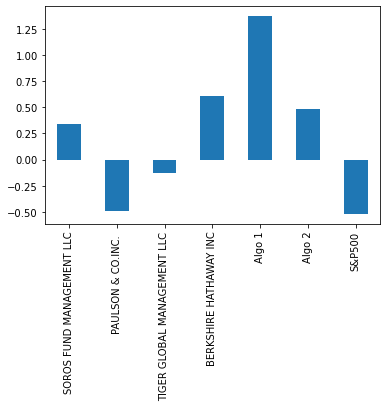

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
aapl_historical_csv = Path('Resources/aapl_historical.csv')
aapl_historical = pd.read_csv(aapl_historical_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_historical.drop(['Symbol'], axis=1, inplace=True)
aapl_historical.columns = ['AAPL']

In [28]:
# Read the second stock
goog_historical_csv = Path('Resources/goog_historical.csv')
goog_historical = pd.read_csv(goog_historical_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_historical.drop(['Symbol'], axis=1, inplace=True)
goog_historical.columns = ['GOOG']

In [29]:
# Read the third stock
cost_historical_csv = Path('Resources/cost_historical.csv')
cost_historical = pd.read_csv(cost_historical_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_historical.drop(['Symbol'], axis=1, inplace=True)
cost_historical.columns = ['COST']

In [30]:
# Concatenate all stocks into a single DataFrame
joined_portfolio = pd.concat([aapl_historical, goog_historical, cost_historical], join='inner', axis='columns')
joined_portfolio.head()

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62


In [31]:
# Reset the index
# YOUR CODE HERE

In [32]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

In [33]:
# Drop Nulls
joined_portfolio.dropna(inplace=True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
joined_returns = joined_portfolio.pct_change()
weights = [1/3, 1/3, 1/3]
portfolio_returns = joined_returns.dot(weights)
portfolio_returns.dropna(inplace=True)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
joined_returns.dropna(inplace=True)
joined_df = pd.concat([df, joined_returns], join='inner', axis='columns')

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df.dropna(inplace=True)

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

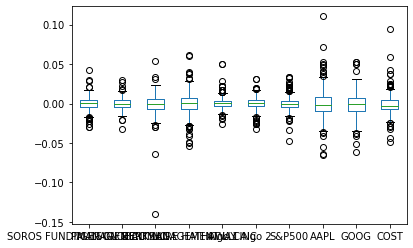

In [37]:
# Risk
joined_df.plot.box()

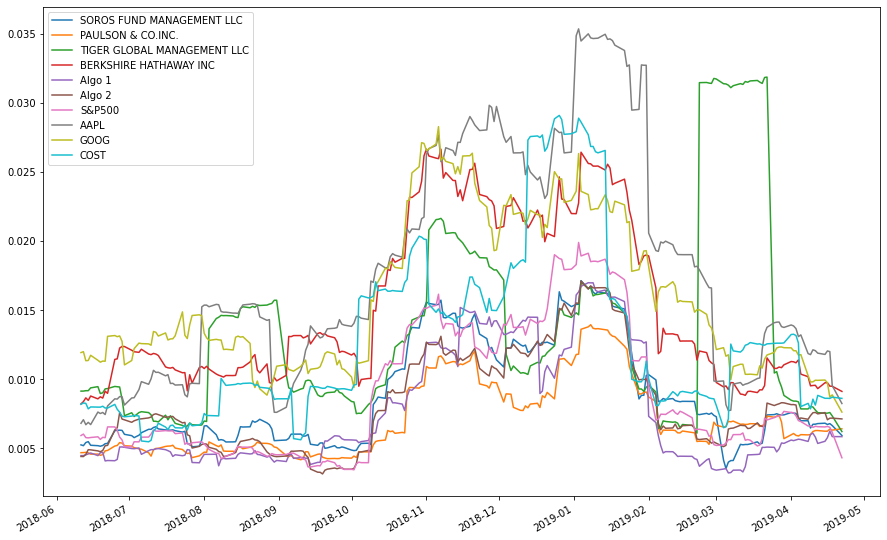

In [44]:
# Rolling
rolling_std = joined_df.rolling(window=21).std()

rolling_std.plot(figsize=(15, 10))

In [39]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_df.mean() * 252) / (joined_df.std() * np.sqrt(252))

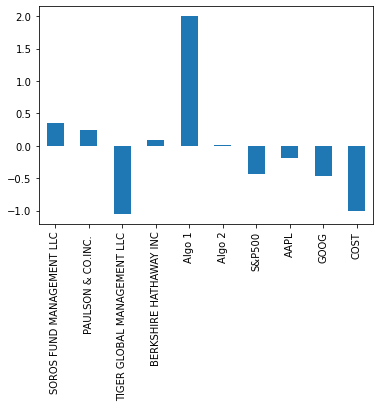

In [40]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

In [46]:
# Create a correlation analysis
correlation = joined_df.corr()
correlation.head(n=10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,AAPL,GOOG,COST
SOROS FUND MANAGEMENT LLC,1.000000,0.791031,0.476938,0.816190,0.336890,0.861989,-0.028091,0.025317,0.102786,0.025258
PAULSON & CO.INC.,0.791031,1.000000,0.484917,0.650132,0.360668,0.783856,-0.059893,0.036633,0.072375,-0.060523
TIGER GLOBAL MANAGEMENT LLC,0.476938,0.484917,1.000000,0.323931,0.113568,0.408381,0.005812,0.012717,0.029522,0.054046
BERKSHIRE HATHAWAY INC,0.816190,0.650132,0.323931,1.000000,0.326025,0.781894,-0.038751,-0.026829,0.061566,-0.015408
Algo 1,0.336890,0.360668,0.113568,0.326025,1.000000,0.364440,-0.054454,0.122388,0.053289,-0.016491
Algo 2,0.861989,0.783856,0.408381,0.781894,0.364440,1.000000,-0.042549,0.033927,0.110559,-0.059772
S&P500,-0.028091,-0.059893,0.005812,-0.038751,-0.054454,-0.042549,1.000000,0.757431,0.790379,0.585367
AAPL,0.025317,0.036633,0.012717,-0.026829,0.122388,0.033927,0.757431,1.000000,0.687135,0.432789
GOOG,0.102786,0.072375,0.029522,0.061566,0.053289,0.110559,0.790379,0.687135,1.000000,0.402915
COST,0.025258,-0.060523,0.054046,-0.015408,-0.016491,-0.059772,0.585367,0.432789,0.402915,1.000000


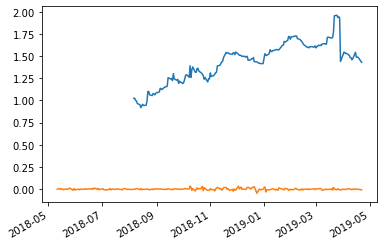

In [48]:
# Beta
covariance = joined_df['AAPL'].rolling(window=60).cov(joined_df['S&P500'])
variance = joined_df['S&P500'].rolling(window=60).var()

beta = covariance / variance
ax = beta.plot(kind='line')